In [1]:
import os
import sys
root_path = os.path.abspath("../../../")
if root_path not in sys.path:
    sys.path.append(root_path)

from Util.Util import DataUtil

(x, y), (x_test, y_test) = DataUtil.gen_noisy_linear(one_hot=False)
x_train, x_cv = x[:9000], x[9000:]
y_train, y_cv = y[:9000], y[9000:]

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def draw_losses(*models):
    plt.figure()
    for nn in models:
        name = str(nn)
        el, tl = nn.log["epoch_loss"], nn.log["test_snapshot_loss"]
        ee_base = np.arange(len(el))
        cse_base = np.linspace(0, len(el) - 1, len(tl))
        plt.plot(ee_base, el, label="Train loss ({})".format(name))
        plt.plot(cse_base, tl, label="Test loss ({})".format(name))
        plt.legend()
    plt.show()

In [3]:
from _Dist.NeuralNetworks.c_BasicNN.NN import Basic

basic = Basic(x_train, y_train, x_cv, y_cv).fit()

Epoch    1   Iter       69   Snapshot      3 (acc)  -  Train : 0.865556   Test :    0.806  -  Current run (3) leads to best checkpoint we've ever had, saving checkpoint in case we need to restore
Epoch    2   Iter      138   Snapshot      6 (acc)  -  Train : 0.902222   Test :    0.815  -  Current run (6) leads to best checkpoint we've ever had, saving checkpoint in case we need to restore
Epoch    4   Iter      253   Snapshot     11 (acc)  -  Train :     0.95   Test :    0.829  -  Current run (11) leads to best result we've ever had, saving checkpoint since performance has improved significantly
Epoch   10   Iter      644   Snapshot     28 (acc)  -  Train : 0.896667   Test :     0.75  -  Early stopped at n_epoch=10 due to 'Over-fitting'
  -  Rolling back to the best checkpoint
INFO:tensorflow:Restoring parameters from _Models\BasicNN_[256, 256]\tmp\Model
  -  Time Cost: 2.8408496379852295


In [4]:
from _Dist.NeuralNetworks.e_AdvancedNN.NN import Advanced

numerical_idx = [True] * 100 + [False]
categorical_columns = []
base_params = {"model_structure_settings": {"use_dndf": False, "use_pruner": False}}

In [5]:
wnd = Advanced(
    x_train, y_train, x_cv, y_cv,
    numerical_idx=numerical_idx, categorical_columns=categorical_columns,
    **base_params
).fit()

This is a 2-classes problem
------------------------------------------------------------
Data     : 9000 training samples, 1000 test samples
Features : 0 categorical, 100 numerical
Deep model: DNN
Deep model input: Continuous features only
------------------------------------------------------------
------------------------------------------------------------
Using dropout with keep_prob = 0.5
Training without batch norm
Hidden units: [256, 256]
Wide model: logistic regression
Wide model input: Continuous features only
------------------------------------------------------------
Hyper parameters
------------------------------------------------------------
This is a Wide & Deep model
------------------------------------------------------------
Activation       : ['relu', 'relu']
Batch size       : 128
Epoch num        : 32
Optimizer        : Adam
Metric           : acc
Loss             : cross_entropy
lr               : 0.001
------------------------------------------------------------


In [6]:
base_params["model_structure_settings"]["use_dndf"] = True
wnd_dndf = Advanced(
    x_train, y_train, x_cv, y_cv,
    numerical_idx=numerical_idx, categorical_columns=categorical_columns,
    **base_params
).fit()

D:\Software\Dev\Anaconda3\lib\site-packages\tensorflow\python\ops\gradients_impl.py:96: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


This is a 2-classes problem
------------------------------------------------------------
Data     : 9000 training samples, 1000 test samples
Features : 0 categorical, 100 numerical
Deep model: DNN
Deep model input: Continuous features only
------------------------------------------------------------
------------------------------------------------------------
Using dropout with keep_prob = 0.5
Training without batch norm
Hidden units: [256, 256]
Wide model: DNDF
Wide model input: Continuous features only
------------------------------------------------------------
Using DNDF with n_tree = 16, tree_depth = 4
Hyper parameters
------------------------------------------------------------
This is a hybrid model
------------------------------------------------------------
Activation       : ['relu', 'relu']
Batch size       : 128
Epoch num        : 32
Optimizer        : Adam
Metric           : acc
Loss             : cross_entropy
lr               : 0.001
-------------------------------------

In [7]:
base_params["model_structure_settings"]["use_pruner"] = True
wnd_dndf_pruned = Advanced(
    x_train, y_train, x_cv, y_cv,
    numerical_idx=numerical_idx, categorical_columns=categorical_columns,
    **base_params
).fit()

D:\Software\Dev\Anaconda3\lib\site-packages\tensorflow\python\ops\gradients_impl.py:96: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


This is a 2-classes problem
------------------------------------------------------------
Data     : 9000 training samples, 1000 test samples
Features : 0 categorical, 100 numerical
Deep model: DNN
Deep model input: Continuous features only
------------------------------------------------------------
------------------------------------------------------------
Using dropout with keep_prob = 0.5
Training without batch norm
Hidden units: [256, 256]
Wide model: DNDF
Wide model input: Continuous features only
------------------------------------------------------------
Using DNDF with n_tree = 16, tree_depth = 4
Hyper parameters
------------------------------------------------------------
This is a hybrid model
------------------------------------------------------------
Activation       : ['relu', 'relu']
Batch size       : 128
Epoch num        : 32
Optimizer        : Adam
Metric           : acc
Loss             : cross_entropy
lr               : 0.001
-------------------------------------

BasicNN              acc  -  Train : 0.926889   CV :    0.829   Test : 0.913333
WnD                  acc  -  Train : 0.903333   CV :     0.84   Test : 0.941333
WnD & DNDF           acc  -  Train : 0.890889   CV :    0.841   Test :     0.95
WnD & DNDF & Pruner  acc  -  Train : 0.873222   CV :    0.838   Test : 0.957333


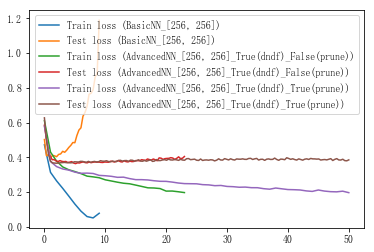

In [8]:
print("BasicNN              ", end="")
basic.evaluate(x_train, y_train, x_cv, y_cv, x_test, y_test)
print("WnD                  ", end="")
wnd.evaluate(x_train, y_train, x_cv, y_cv, x_test, y_test)
print("WnD & DNDF           ", end="")
wnd_dndf.evaluate(x_train, y_train, x_cv, y_cv, x_test, y_test)
print("WnD & DNDF & Pruner  ", end="")
wnd_dndf_pruned.evaluate(x_train, y_train, x_cv, y_cv, x_test, y_test)
draw_losses(basic, wnd_dndf, wnd_dndf_pruned)